In [25]:
install.packages("GGally")

also installing the dependency ‘reshape’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [26]:
#Libraries for classifying and modeling data
library(tidyverse)
library(tidymodels)
library(broom)
library(repr)
library(ggplot2)
library(GGally)
options(repr.matrix.max.rows = 6)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# **Determine heart disease patients from Cleveland based on age, blood pressure, cholestorol, maximum heart rate, and ST depression.**

### Vedant Kalyani, Dylan Tan, Audrey Zeilstra, Kevin Zhu


### Introduction

Heart disease is a major health issue that affects millions of people worldwide. There are many factors that increase the risk of heart disease, including age, cholestorol, heart rate and so on.

For example, low heart rate may cause frequent failing, inability of the heart to pump enough blood (heart failure), sudden cardiac arrest or sudden death. The goal of the project is to predict whether a patient is likely to have heart disease based on these risk factors.

The question we will Try to answer is: **Is a patient likely to have heart disease, based on measurement and analysis of age, blood pressure, cholesterol, maximum heart rate, and ST depression?**

We are using the processed.cleveland.data from the Heart Disease Database as the dataset.

### Method

We are using the processed.cleveland.data from the Heart Disease Database as the dataset. Our goal of the project is to predict if a patient from Cleveland will have heart disease based on predictors. We give names to each columns using colnames(). The predictors are selected from the following columns:

1. **Age**: patient’s age
2. **Sex**: sex (1 = male, 0 = female)
3. **Type_Chest_Pain**: chest pain type
4. **Resting_Blood_Pressure**: resting blood pressure
5. **Cholestorol**: serum cholestoral in mg/dl
6. **Fasting_Blood_Sugar**: fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. **Resting_ECG_Results**: resting electrocardiographic results
8. **Max_Heart_Rate**: maximum heart rate achieved
9. **Exercise_Angina**: whether exercise induced angina (1 = True, 0 = False)
10. **ST_Depression_Exercise**: ST depression induced by exercise, relative to rest
11. **Slope**: the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. **Major_Vessels**: number of major vessels (0-3) colored by flourosopy
13. **Thalassemia**: (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. **Diagnosis**: diagnosis of heart disease

We first clean the data. In the original dataset, it use integers in column **num** to represent diagnosis of heart disease, but we just need to determine whether or not a patient has heart disease. Therefore, we use **mutate** to create a new column **Diagnosis**, and divided it into two cases, which are “Positive” and “Negative”.

Then. We used **initial_split()** to split the dataframe into 75% training and 25% testing data, stratifying for **Diagnosis**. The training set is what we will use for analysis.

To summarize our data, we grouped by **Diagnosis** then summarized for the mean of five columns:  **Age, Resting_Blood_Pressure, Cholestorol, Max_Heart_Rate, and ST_Depression_Exercise**. We found that the patient with “Positive” diagnosis have a relatively higher age, resting blood pressure, and cholestorol, and lower max heart rate. It is not hard to see the difference between values, and we can analysis and try to find classification of the plot based on it.

To visualize relationships for the dataframe, we generated scatter plots of two different columns of value against each other. Based on the plots we create, we can determine which are the best predictor to use. We colored the scatter plot point based on **Diagnosis**, it clearly shows the “Positive” and “Negative” diagnosis based on two variables. The plots are shown, we may not use **figure 1.3, 1.4, and 1.5**, because the dots are mix together, and it’s hard to tell the distinct distribution. **Figure 1.1 and 1.2**, have more distinct distribution, which may be what we want for the project.



In [27]:
options(repr.matrix.max.rows = 6)

#Read dataset from the repository
cleveland_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")

#Make column names readable
colnames(cleveland_disease_data) <- c("Age", "Sex", "Type_Chest_Pain", "Resting_Blood_Pressure", "Cholestorol", "Fasting_Blood_Sugar", "Resting_ECG_Results",
                                         "Max_Heart_Rate", "Exercise_Angina", "ST_Depression_Exercise", "Slope", "Major_Vessels", "Thalassemia", "Diagnosis")

cleveland_tidy_data <- cleveland_disease_data |>
    mutate(Diagnosis = case_when(Diagnosis != 0 ~ 1,
                                 Diagnosis == 0 ~ 0)) |>
    mutate(Diagnosis = as.factor(Diagnosis)) |>
mutate(Sex = case_when(Sex != 0 ~ "male",
                                 Sex == 0 ~ "female"))

cleveland_tidy_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,Type_Chest_Pain,Resting_Blood_Pressure,Cholestorol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate,Exercise_Angina,ST_Depression_Exercise,Slope,Major_Vessels,Thalassemia,Diagnosis
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,female,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,male,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [28]:
set.seed(2000)
#Splitting data into training and testing datasets
cleveland_split <- initial_split(cleveland_tidy_data, prop = 0.75, strata = Diagnosis)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)

Age,Sex,Type_Chest_Pain,Resting_Blood_Pressure,Cholestorol,Fasting_Blood_Sugar,Resting_ECG_Results,Max_Heart_Rate,Exercise_Angina,ST_Depression_Exercise,Slope,Major_Vessels,Thalassemia,Diagnosis
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,male,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
57,female,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
57,male,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0
56,female,2,140,294,0,2,153,0,1.3,2,0.0,3.0,0


In [29]:
cleveland_summary_data <- cleveland_training |>
                        group_by(Diagnosis) |>
                        summarize(Mean_Age = mean(Age),
                                  Mean_RBP = mean(Resting_Blood_Pressure),
                                  Mean_Chol = mean(Cholestorol),
                                  Mean_MHR = mean(Max_Heart_Rate),
                                  Mean_STDE = mean(ST_Depression_Exercise),
                                 No._Patients = n())
cleveland_summary_data             

Diagnosis,Mean_Age,Mean_RBP,Mean_Chol,Mean_MHR,Mean_STDE,No._Patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,52.54098,128.1639,243.6885,157.7623,0.6188525,122
1,56.99038,133.5673,248.5385,139.1346,1.5605769,104


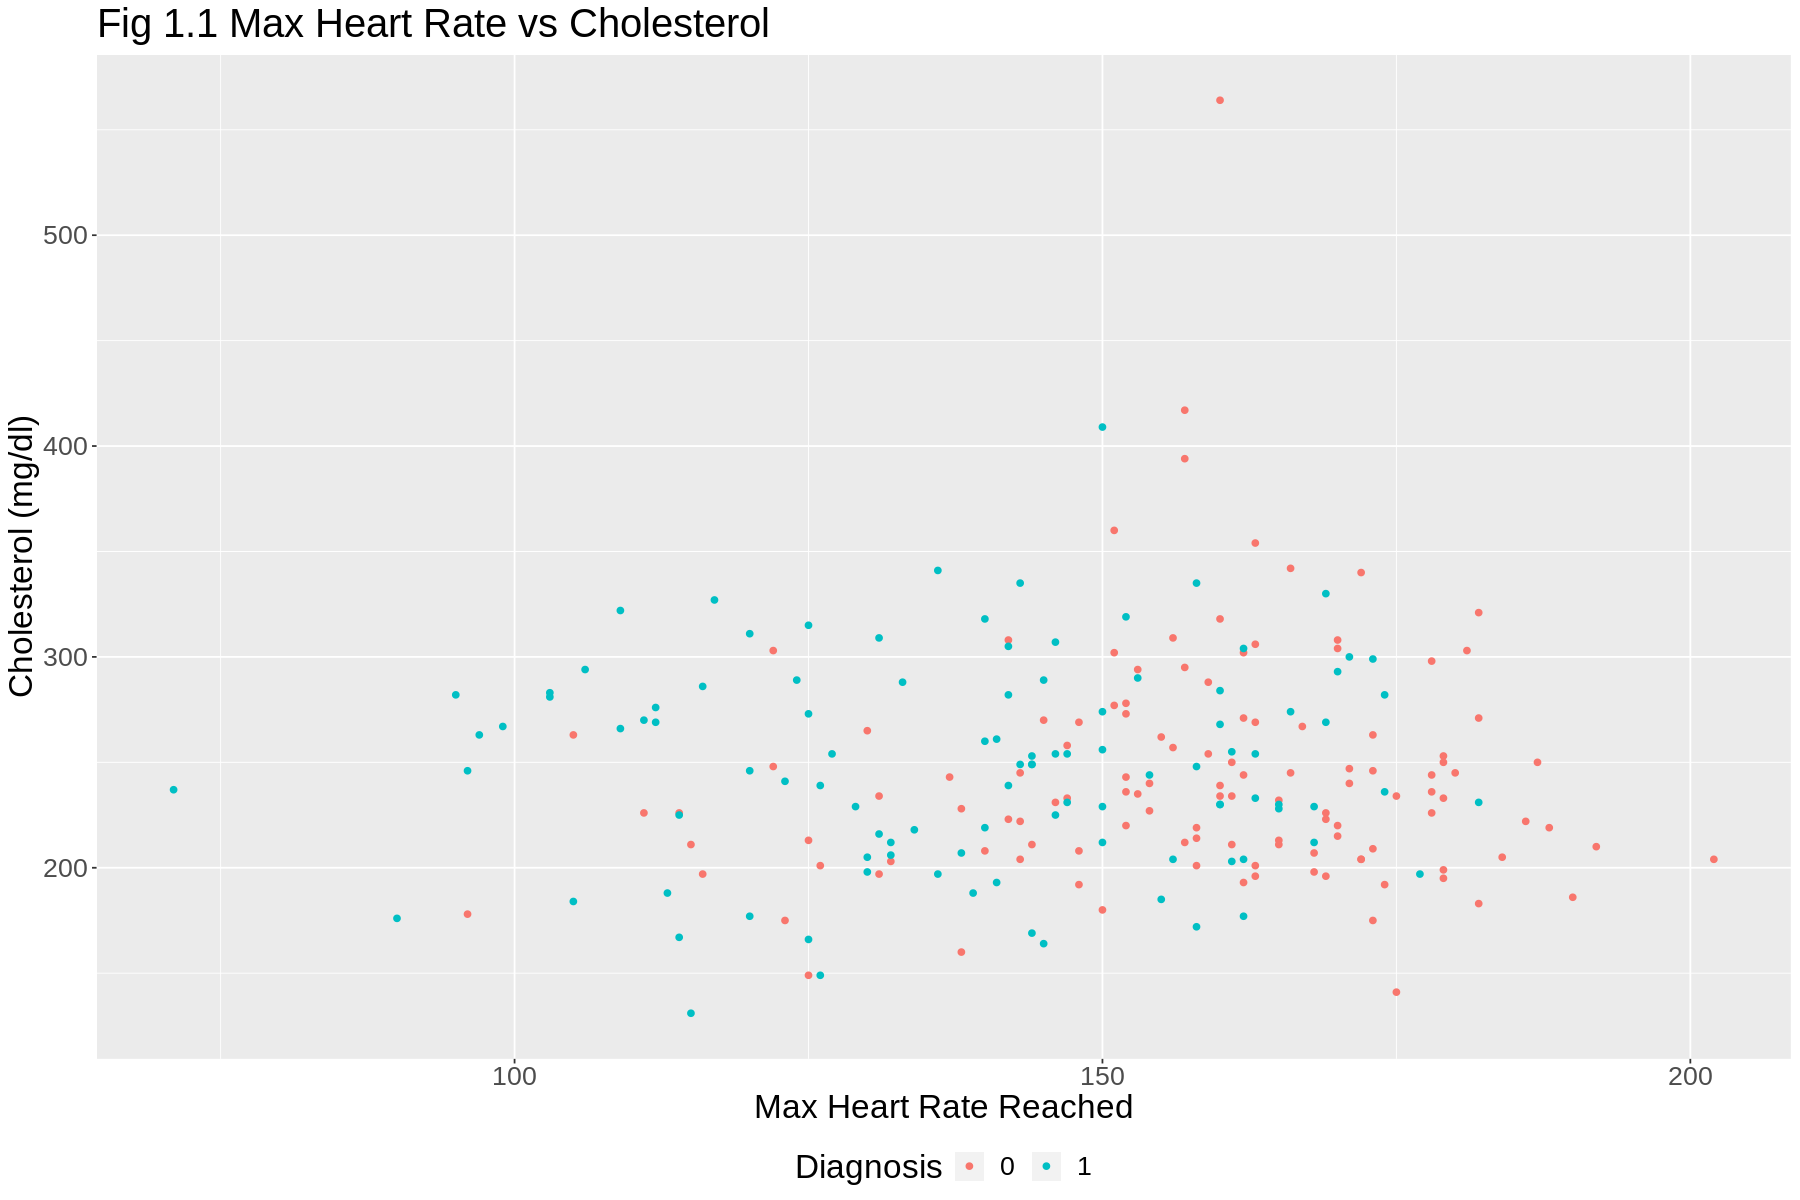

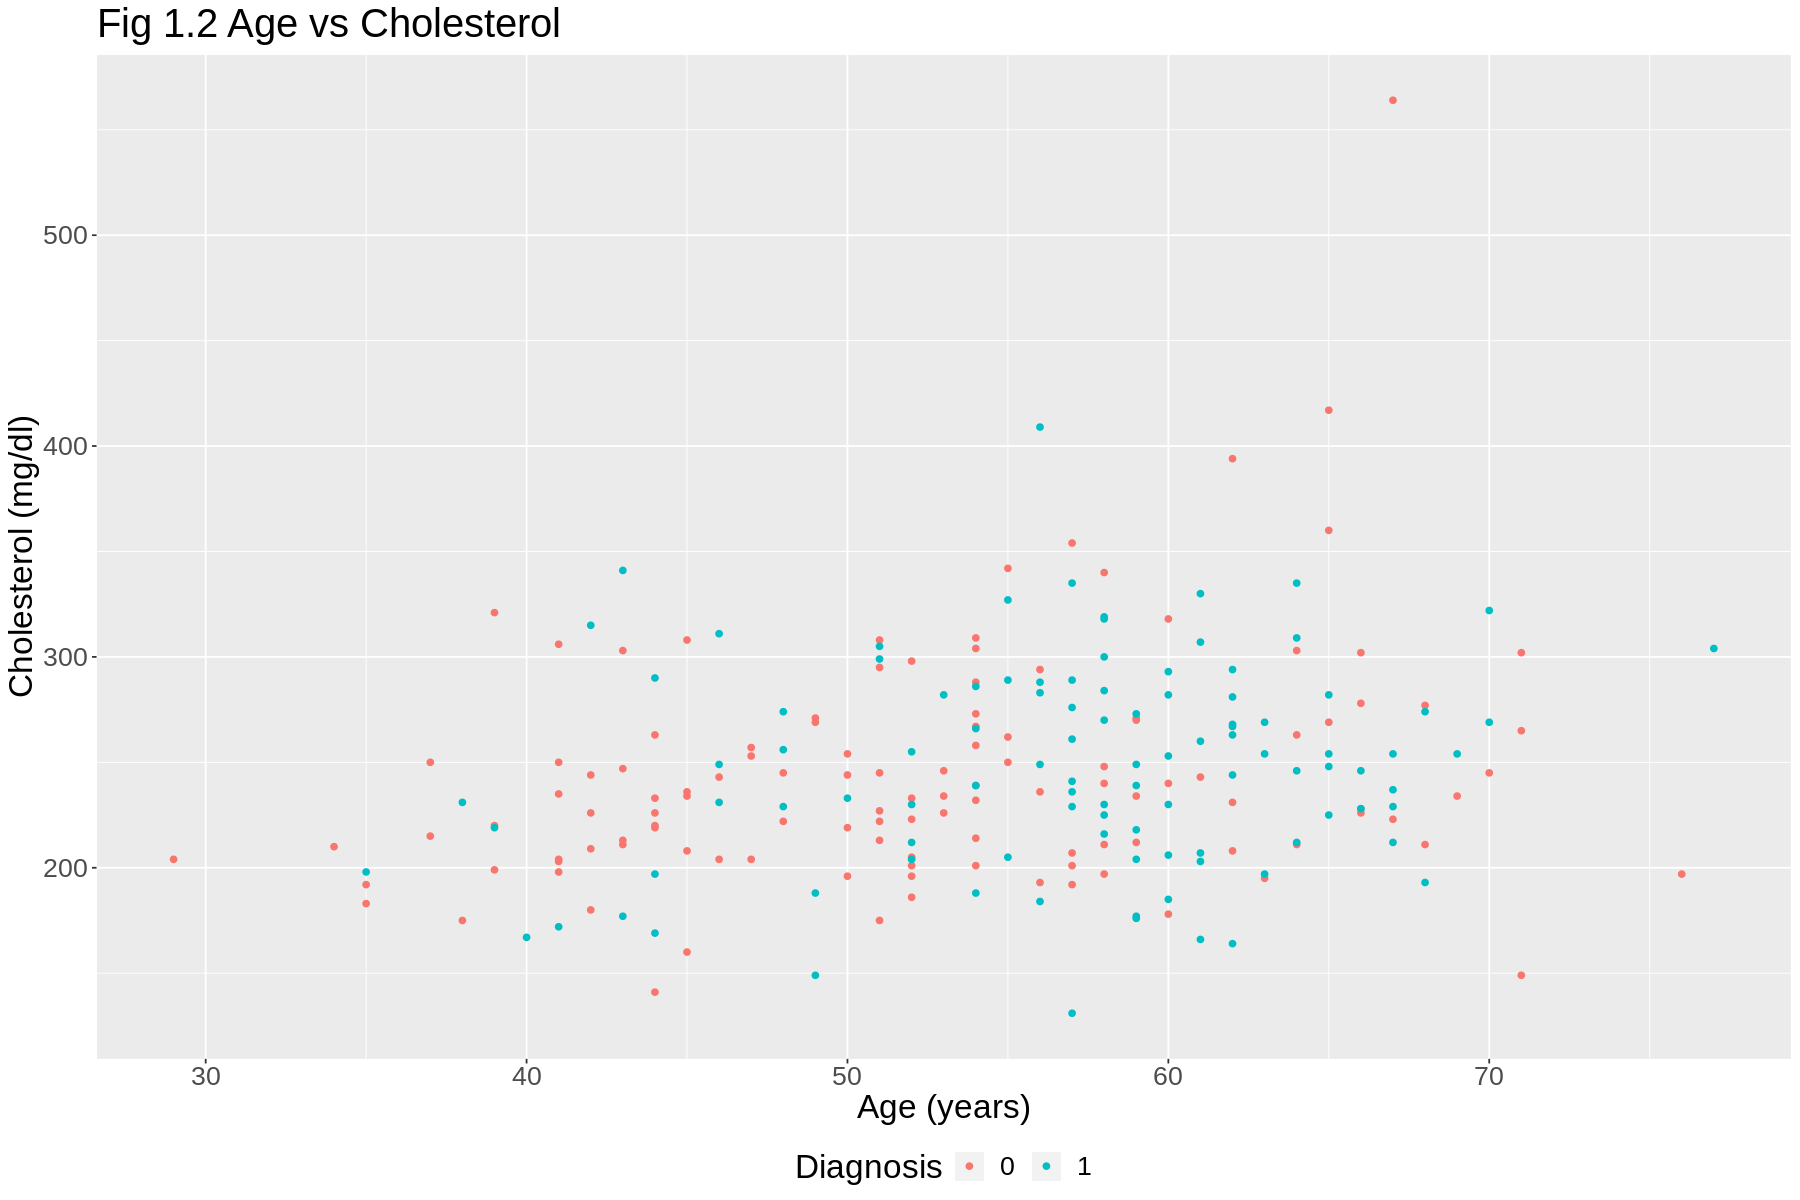

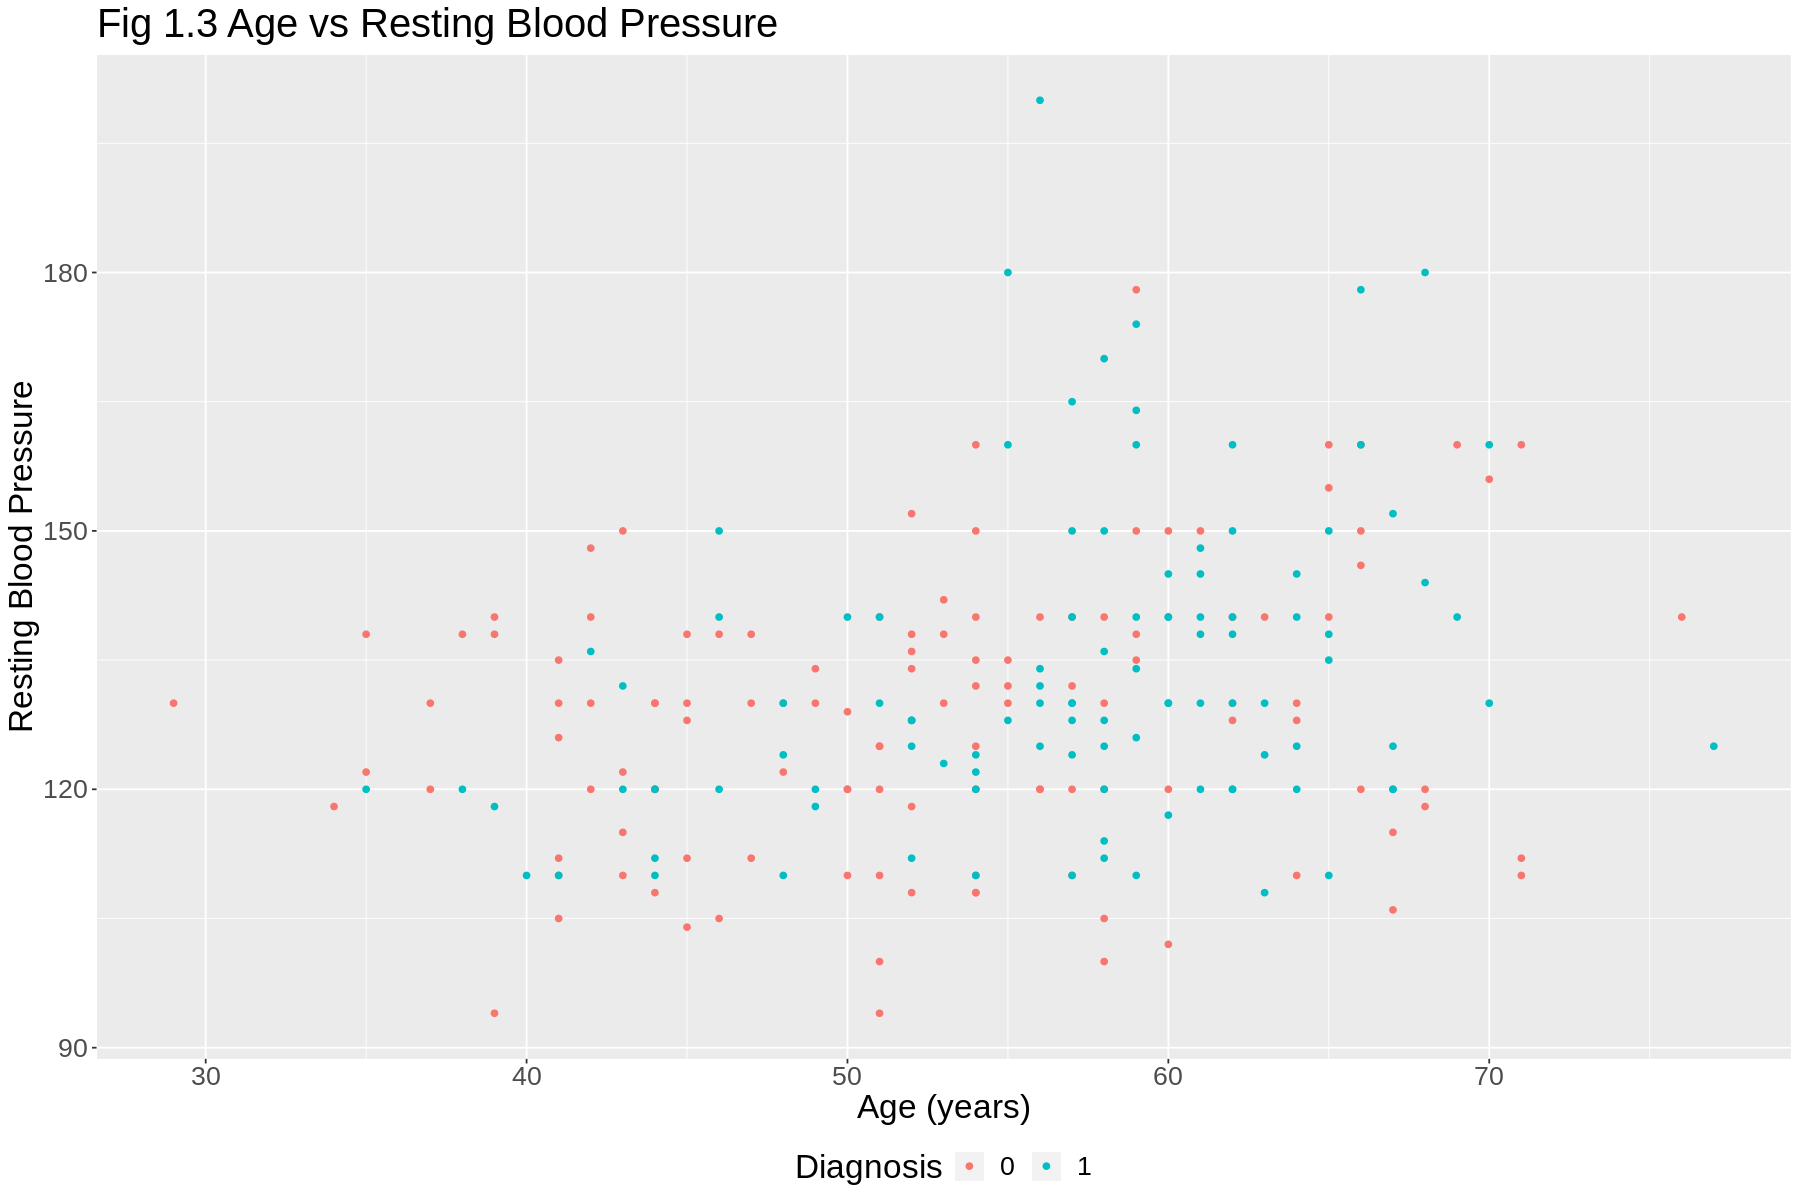

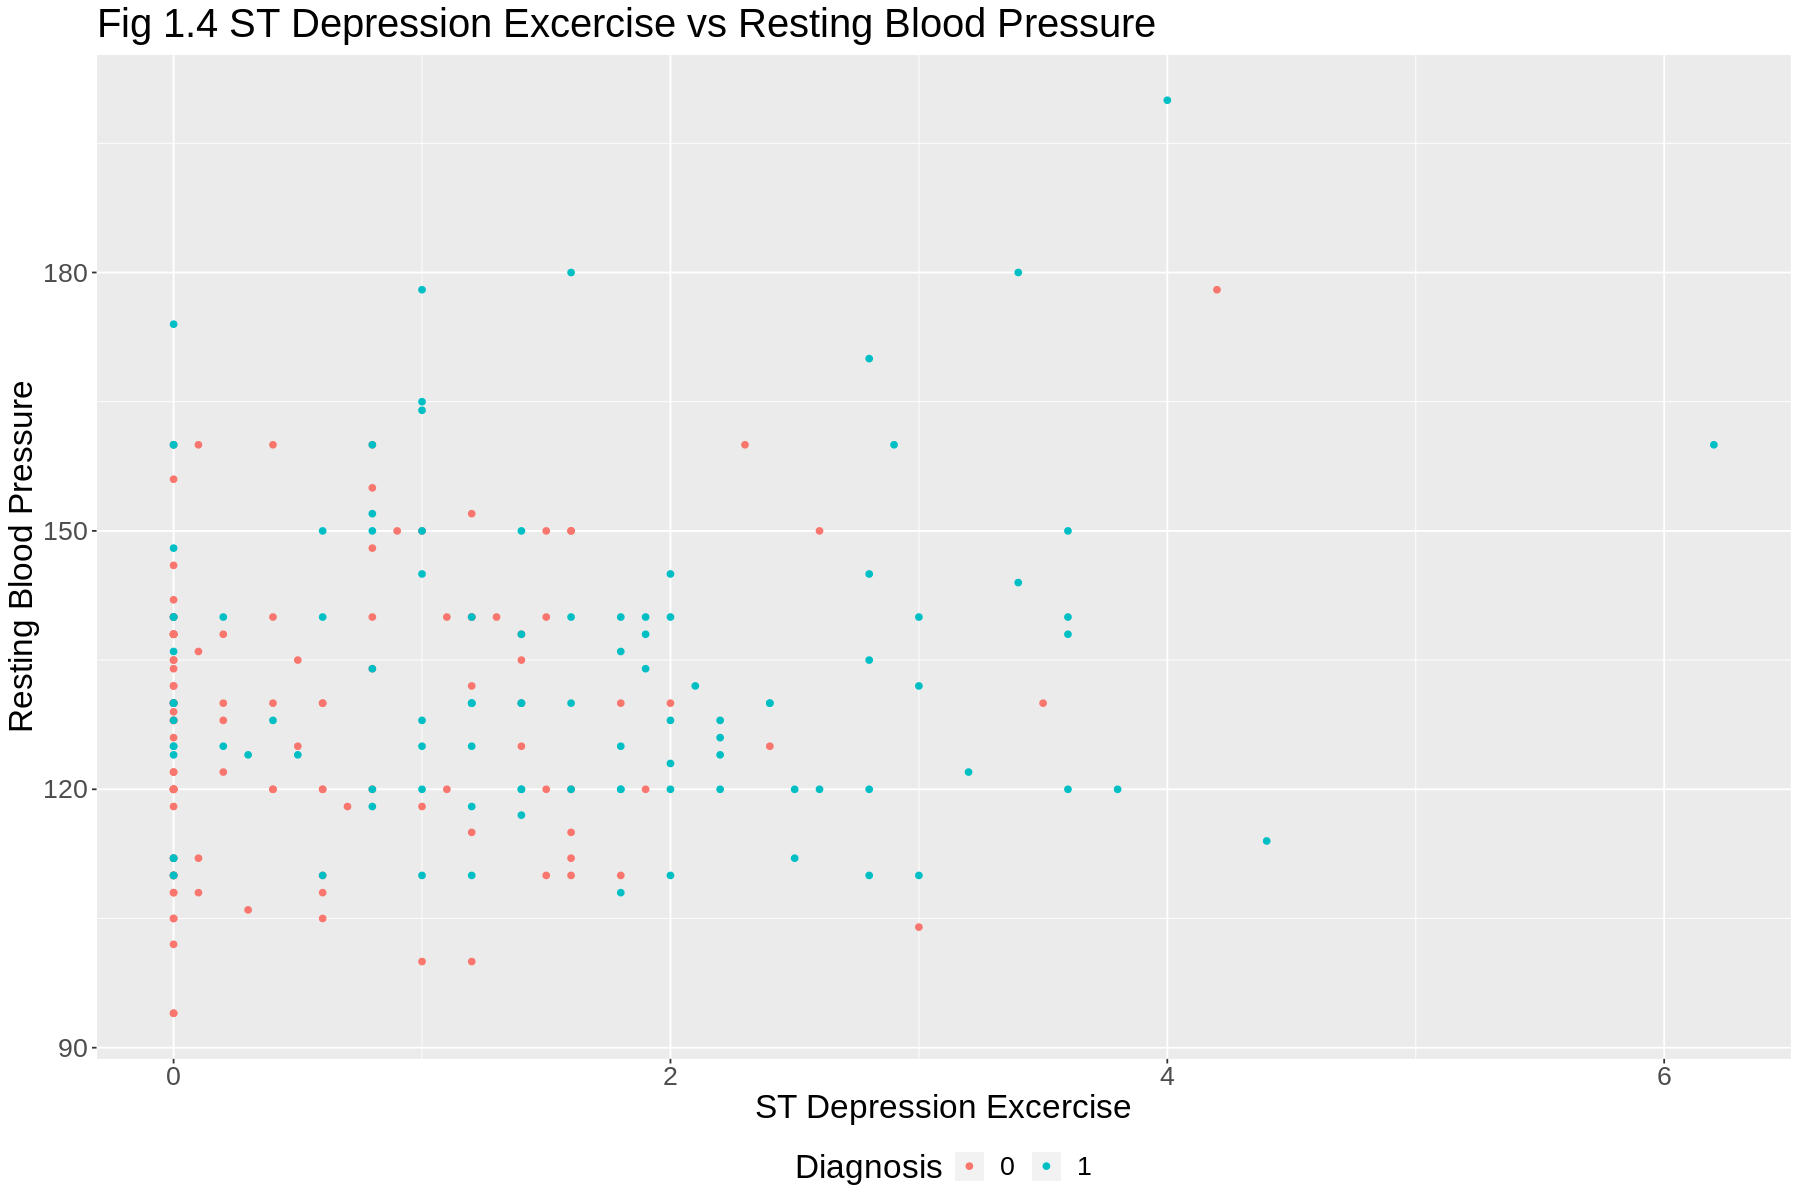

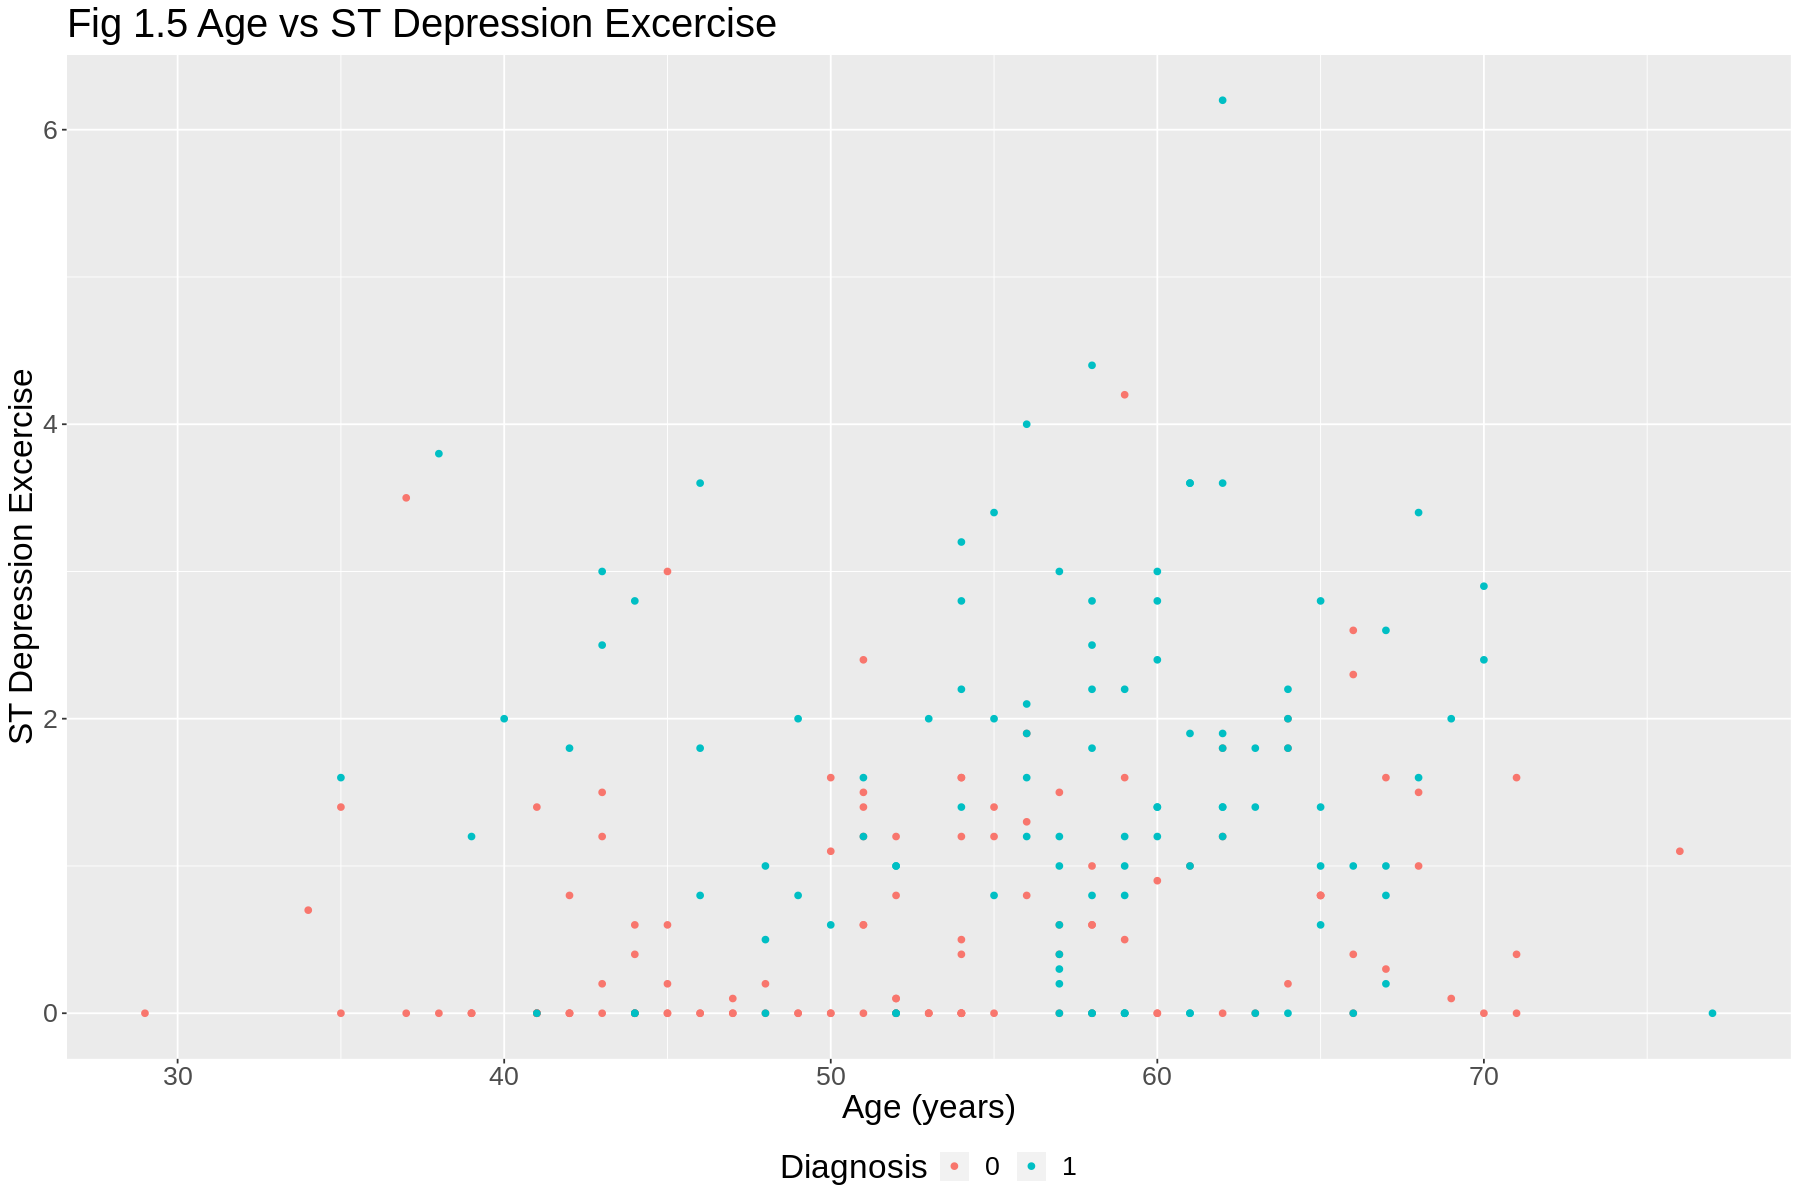

In [30]:
prop_plot1 <- ggplot(cleveland_training, aes(x = Max_Heart_Rate, y = Cholestorol, color = Diagnosis)) +
                 geom_point() +
                 labs(x = "Max Heart Rate Reached", y = "Cholesterol (mg/dl)", color = "Diagnosis") +
                 ggtitle("Fig 1.1 Max Heart Rate vs Cholesterol") +
                 theme(text = element_text(size = 20), legend.position = "bottom")
                

prop_plot2 <- ggplot(cleveland_training, aes(x = Age, y = Cholestorol, color = Diagnosis)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "Cholesterol (mg/dl)", color = "Diagnosis") +
                 ggtitle("Fig 1.2 Age vs Cholesterol") +
                 theme(text = element_text(size = 20), legend.position = "bottom")     

prop_plot3 <- ggplot(cleveland_training, aes(x = Age, y = Resting_Blood_Pressure, color = Diagnosis)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "Resting Blood Pressure", color = "Diagnosis") +
                 ggtitle("Fig 1.3 Age vs Resting Blood Pressure") +
                 theme(text = element_text(size = 20), legend.position = "bottom")

prop_plot4 <- ggplot(cleveland_training, aes(x = ST_Depression_Exercise, y = Resting_Blood_Pressure, color = Diagnosis)) +
                 geom_point() +
                 labs(x = "ST Depression Excercise", y = "Resting Blood Pressure", color = "Diagnosis") +
                 ggtitle("Fig 1.4 ST Depression Excercise vs Resting Blood Pressure") +
                 theme(text = element_text(size = 20), legend.position = "bottom")

prop_plot5 <- ggplot(cleveland_training, aes(x = Age, y = ST_Depression_Exercise, color = Diagnosis)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "ST Depression Excercise", color = "Diagnosis") +
                 ggtitle("Fig 1.5 Age vs ST Depression Excercise") +
                 theme(text = element_text(size = 20), legend.position = "bottom")
                 
prop_plot1
prop_plot2
prop_plot3
prop_plot4
prop_plot5

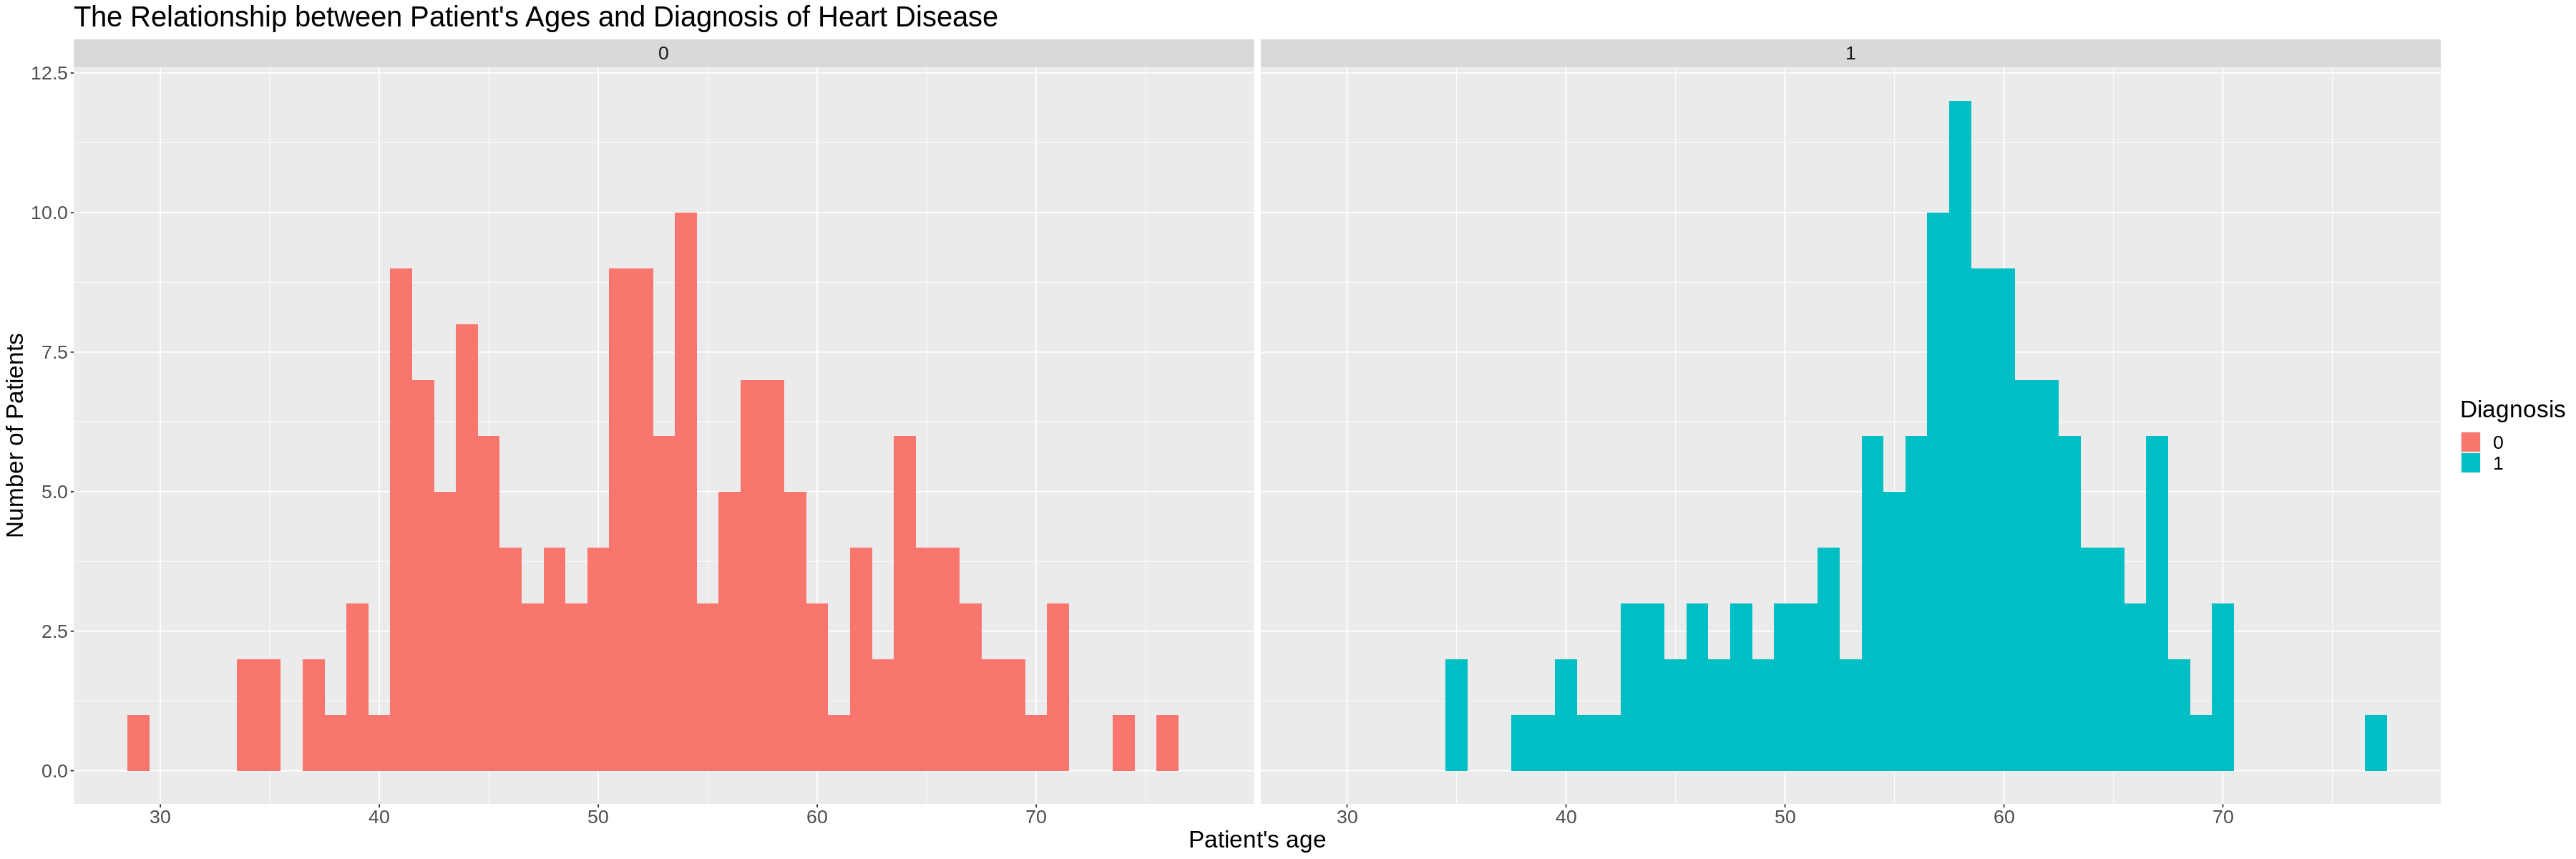

In [76]:
options(repr.plot.width = 30, repr.plot.height = 10)

age_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Age, fill = Diagnosis))+
    geom_histogram(binwidth = 1)+
    facet_grid(cols = vars(Diagnosis))+
    ggtitle("The Relationship between Patient's Ages and Diagnosis of Heart Disease")+
    labs(x = "Patient's age", y = "Number of Patients", fill = "Diagnosis")+
    theme(text = element_text(size = 20))
age_diagnosis_plot

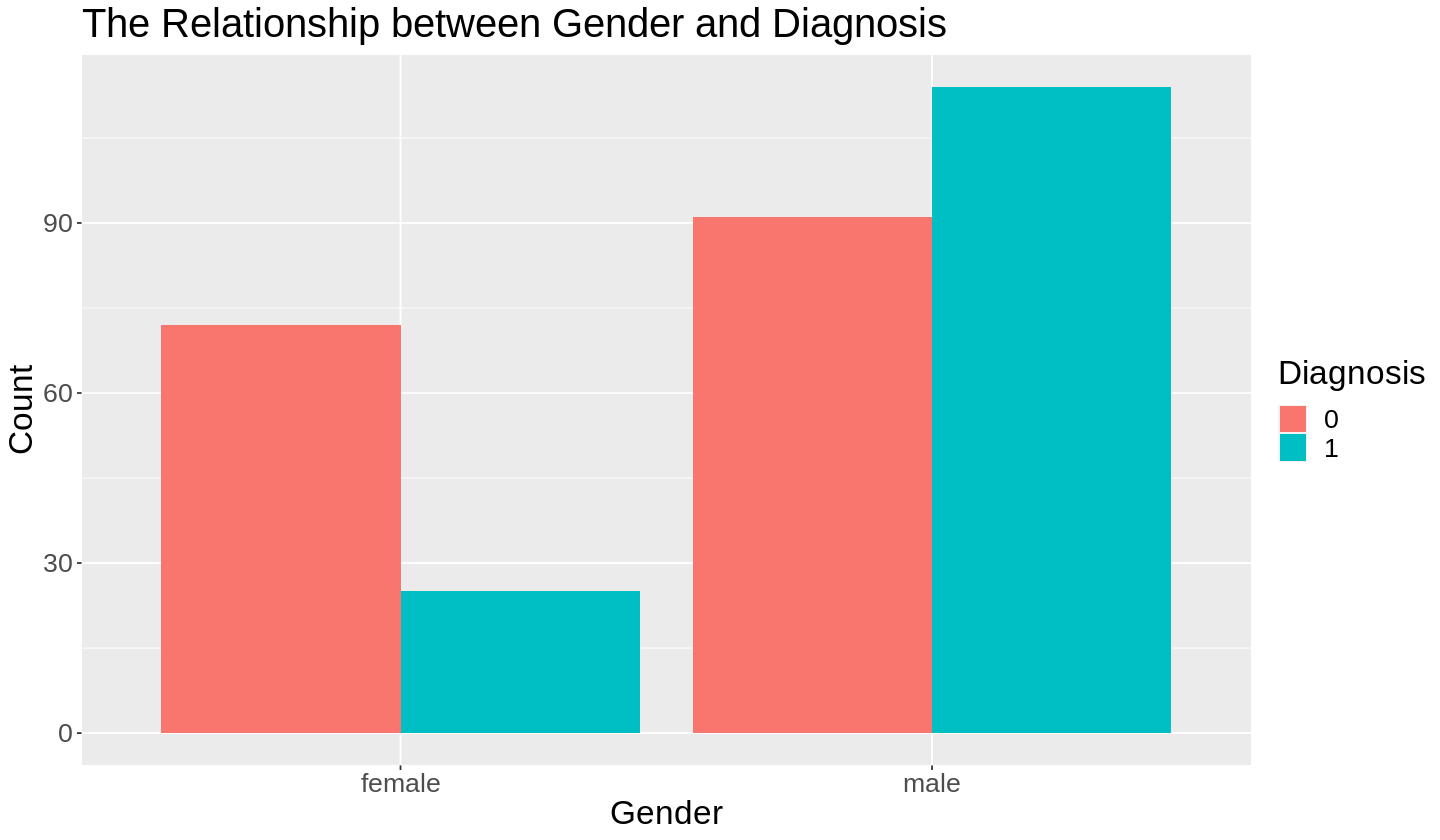

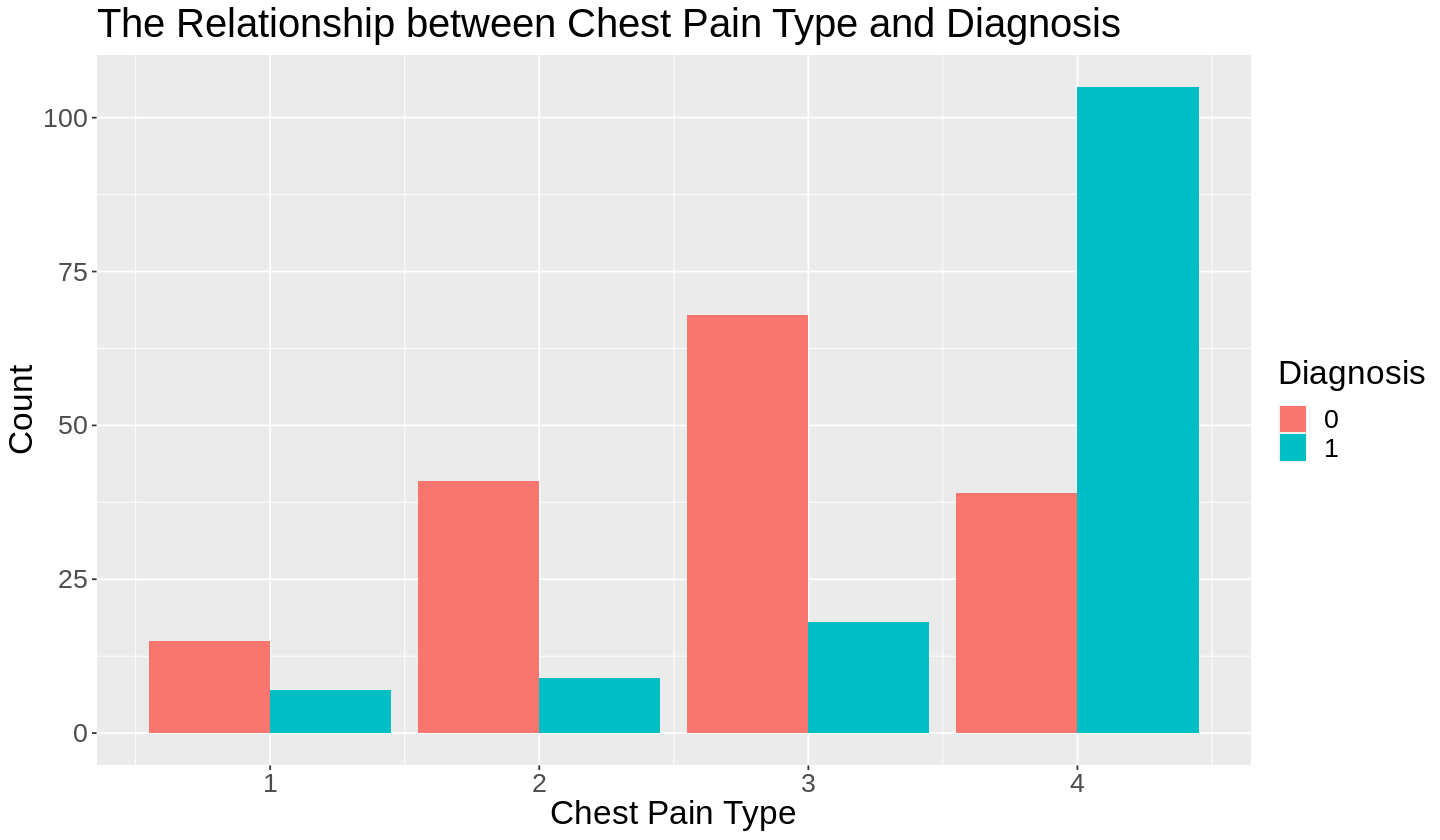

In [77]:
options(repr.plot.width = 12, repr.plot.height = 7)

sex_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Sex, fill = Diagnosis)) +
    geom_bar(position = "dodge")+
    labs(x = "Gender", y = "Count", fill = "Diagnosis")+
    ggtitle("The Relationship between Gender and Diagnosis")+
    theme(text = element_text(size = 20))
sex_diagnosis_plot

tcp_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Type_Chest_Pain, fill = Diagnosis)) +
    geom_bar(position = "dodge")+
    labs(x = "Chest Pain Type", y = "Count", fill = "Diagnosis")+
    ggtitle("The Relationship between Chest Pain Type and Diagnosis")+
    theme(text = element_text(size = 20))
tcp_diagnosis_plot

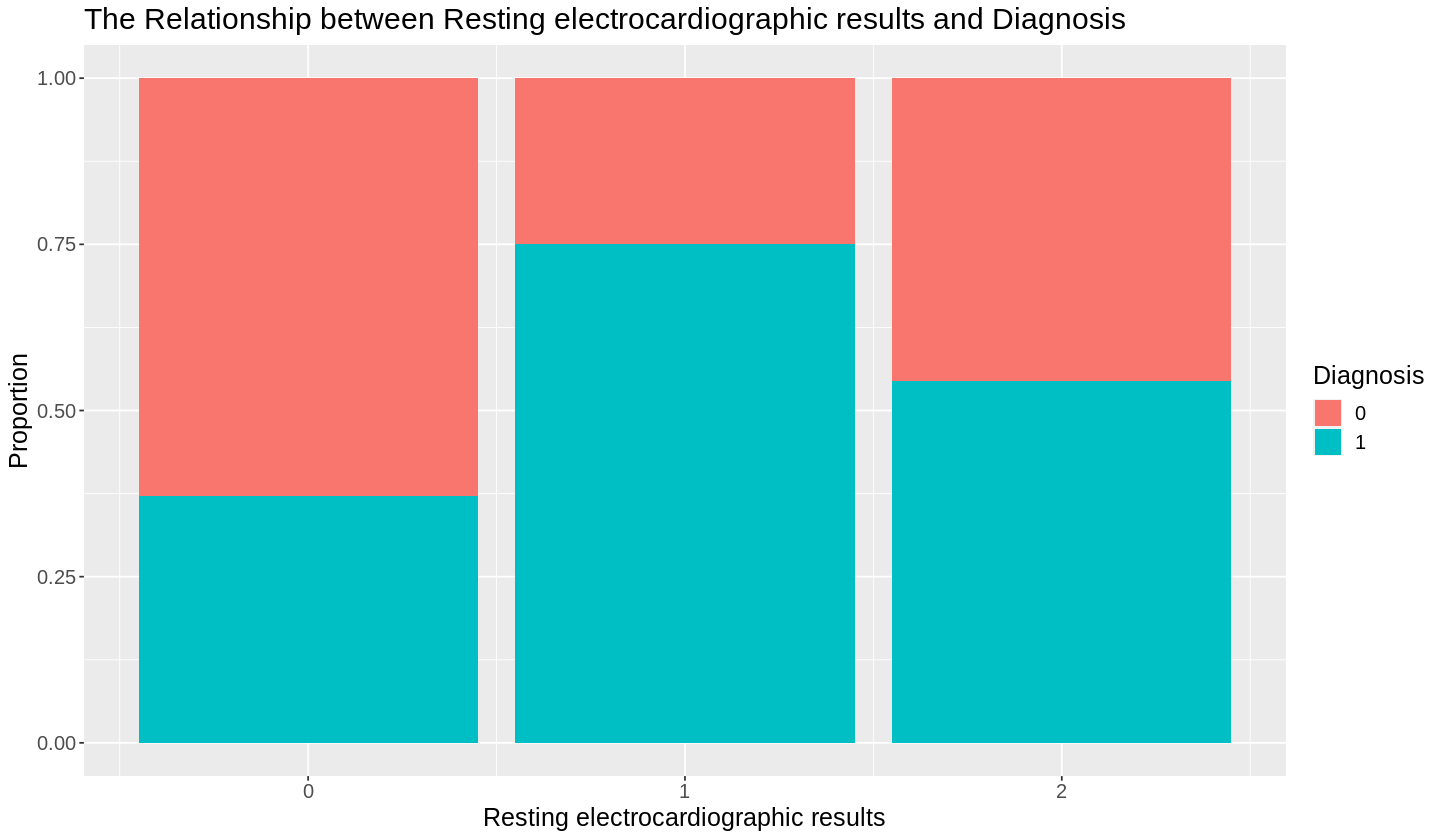

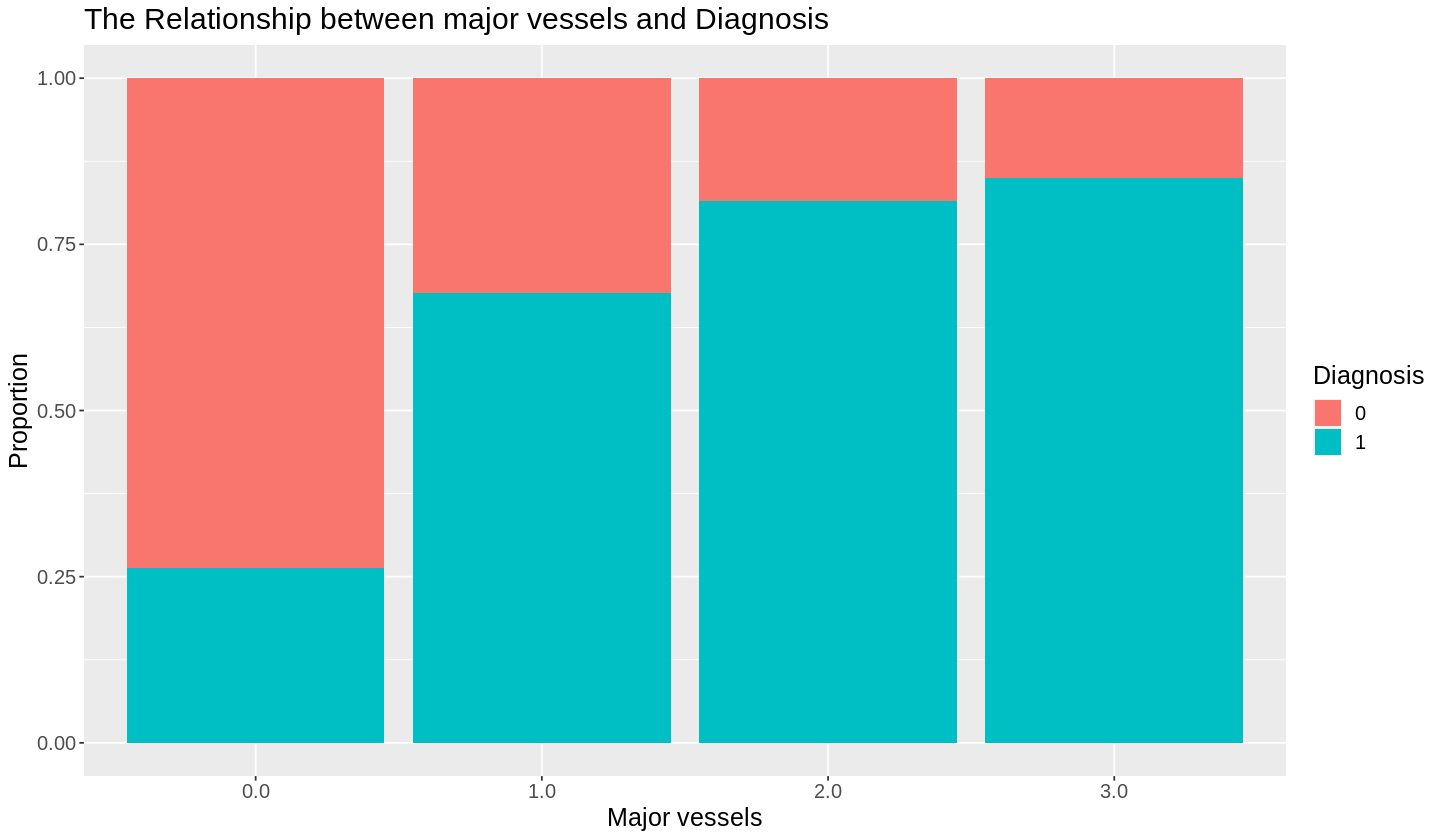

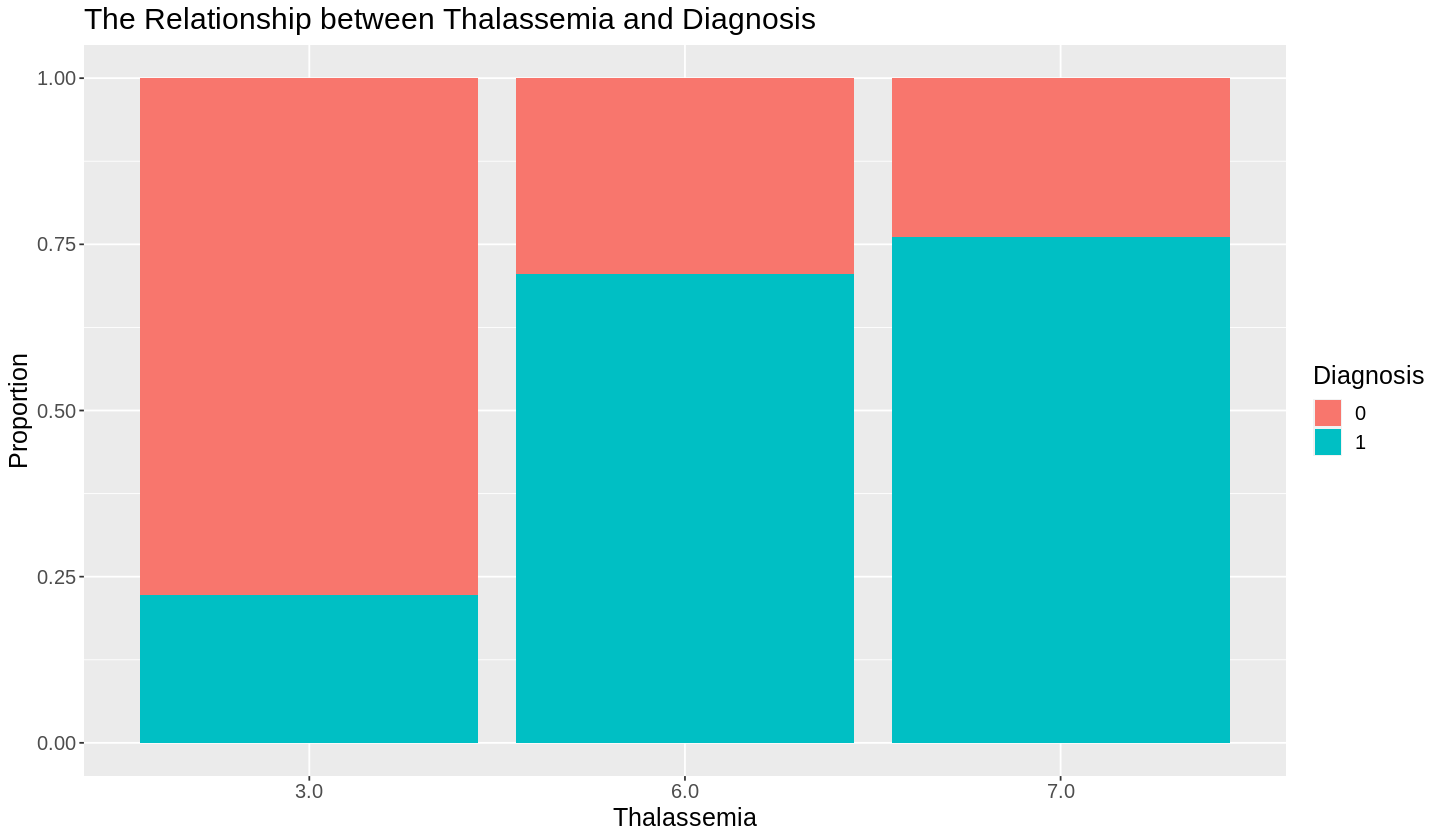

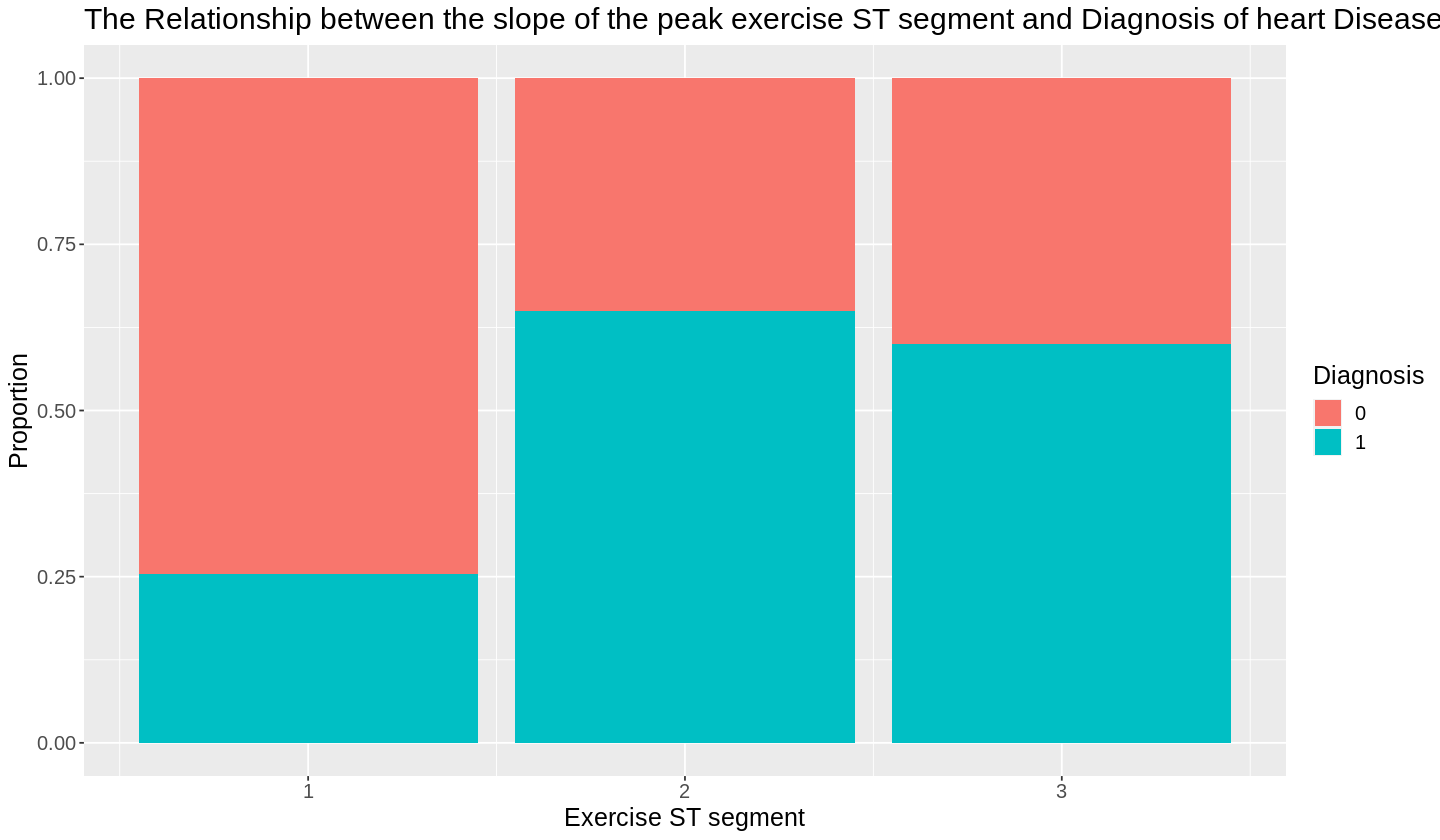

In [75]:
options(repr.plot.width = 12, repr.plot.height = 7)
ecg_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Resting_ECG_Results, fill = Diagnosis)) +
    geom_bar(position = "fill")+
    labs(x = "Resting electrocardiographic results", y = "Proportion",  fill = "Diagnosis")+
    ggtitle("The Relationship between Resting electrocardiographic results and Diagnosis")+
    theme(text = element_text(size = 15))

mv_diagnosis_plot <- cleveland_tidy_data |>
filter(Major_Vessels != "?") |>
    ggplot(aes(x = Major_Vessels, fill = Diagnosis)) +
    geom_bar(position = "fill")+
    labs(x = "Major vessels", y = "Proportion",  fill = "Diagnosis")+
    ggtitle("The Relationship between major vessels and Diagnosis")+
    theme(text = element_text(size = 15))

tha_diagnosis_plot <- cleveland_tidy_data |>
filter(Thalassemia != "?") |>
    ggplot(aes(x = Thalassemia, fill = Diagnosis)) +
    geom_bar(position = "fill")+
    labs(x = "Thalassemia", y = "Proportion",  fill = "Diagnosis")+
    ggtitle("The Relationship between Thalassemia and Diagnosis")+
    theme(text = element_text(size = 15))

slope_diagnosis_plot <- cleveland_tidy_data |>

    ggplot(aes(x = Slope, fill = Diagnosis)) +
    geom_bar(position = "fill")+
    labs(x = "Exercise ST segment", y = "Proportion",  fill = "Diagnosis")+
    ggtitle("The Relationship between the slope of the peak exercise ST segment and Diagnosis of heart Disease")+
    theme(text = element_text(size = 15))

ecg_diagnosis_plot
mv_diagnosis_plot
tha_diagnosis_plot
slope_diagnosis_plot

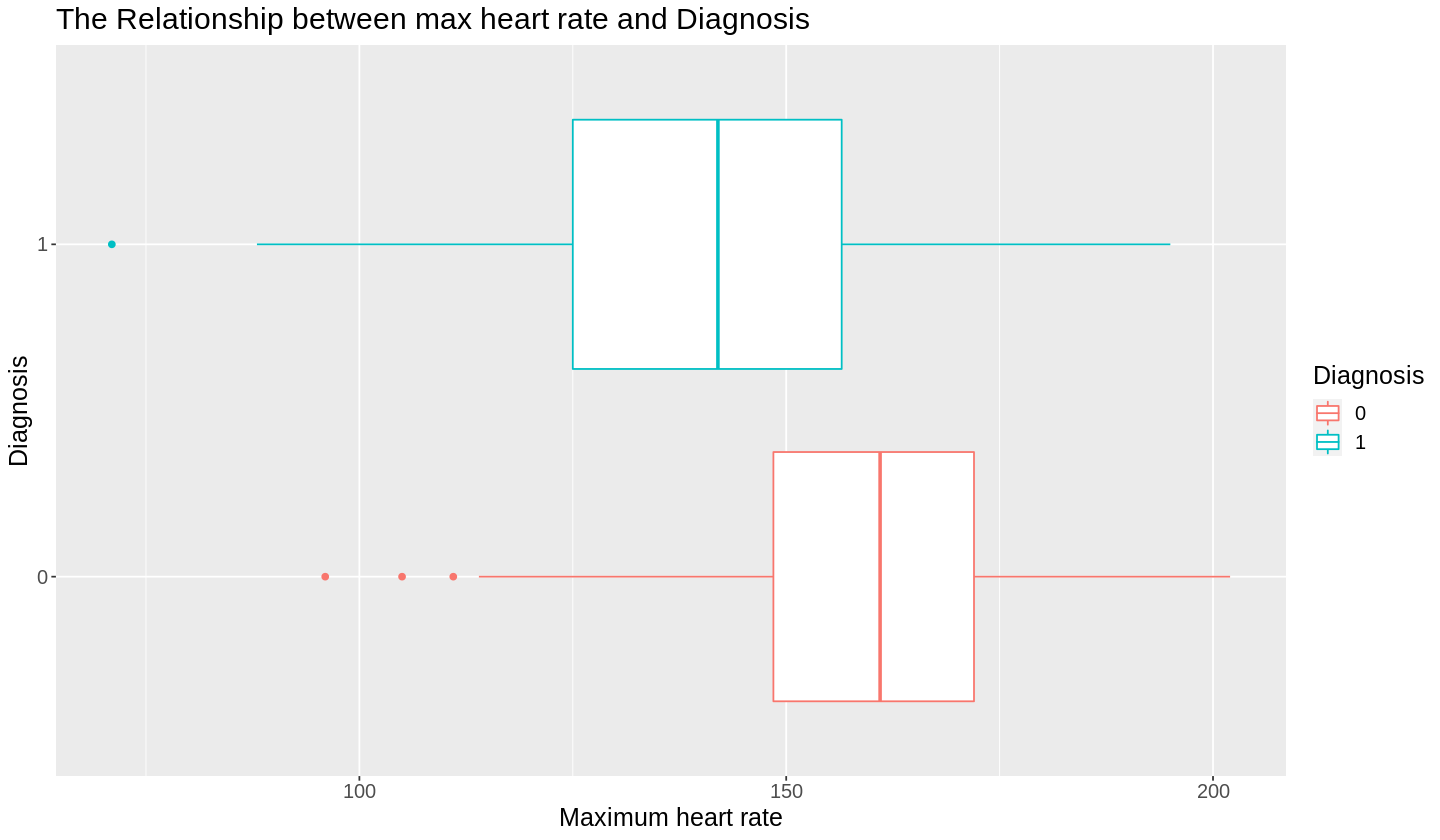

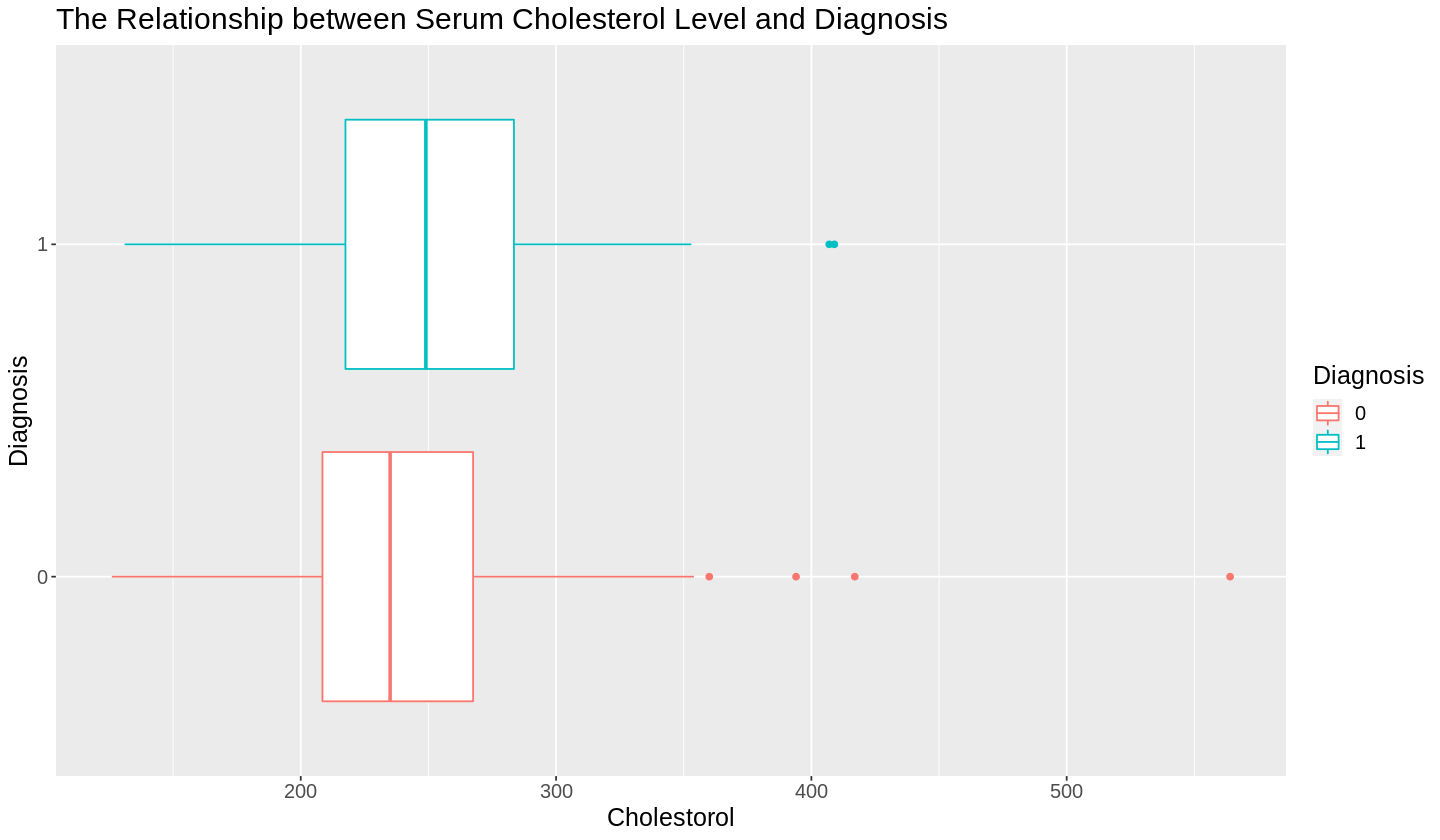

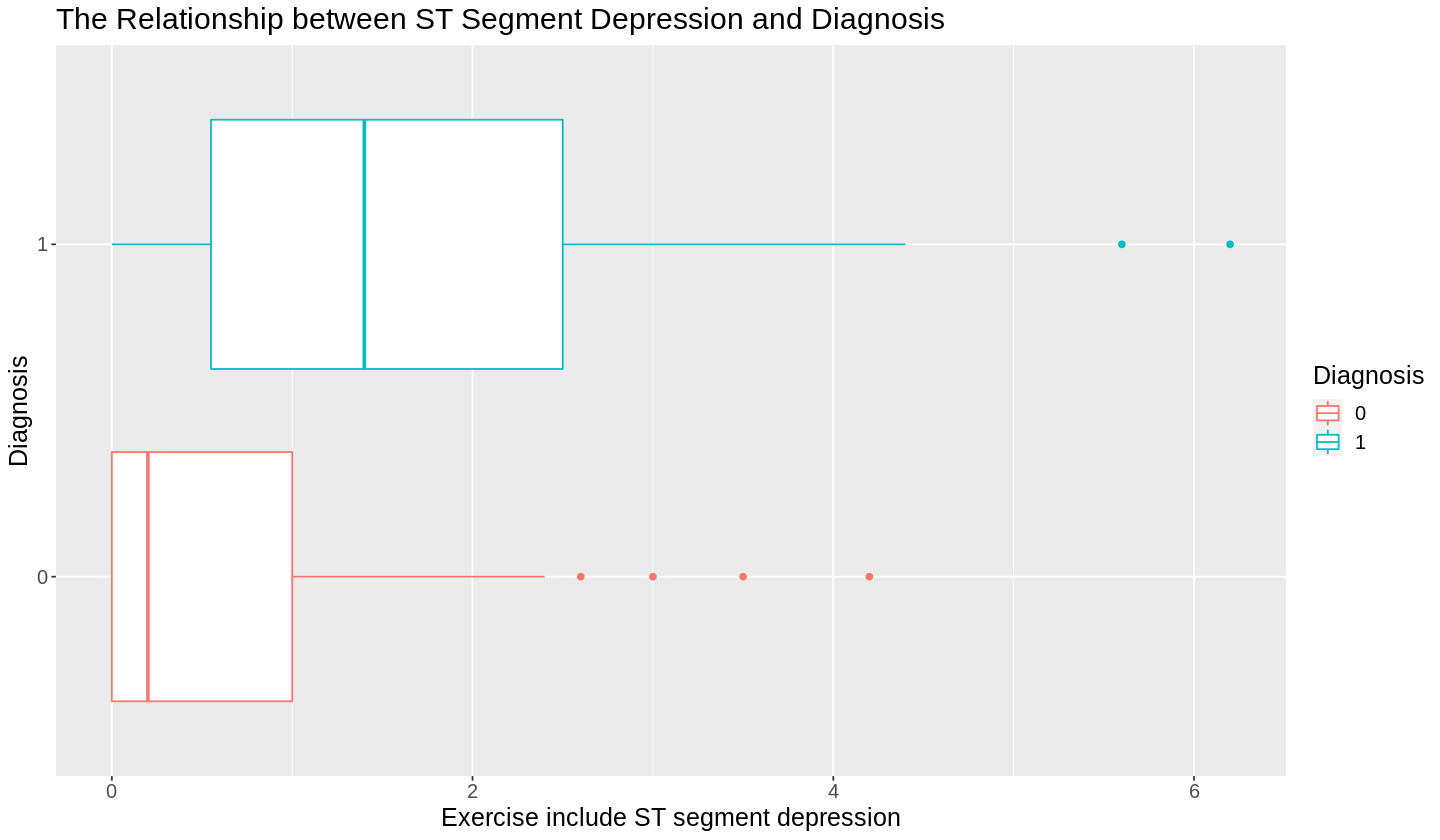

In [74]:
mhr_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Max_Heart_Rate, y = Diagnosis, color = Diagnosis)) +
    geom_boxplot() +
    labs(x = "Maximum heart rate", y = "Diagnosis", color = "Diagnosis") +
    ggtitle("The Relationship between max heart rate and Diagnosis")+
    theme(text = element_text(size = 15))
mhr_diagnosis_plot

cholestorol_diagnosis_plot <- cleveland_tidy_data |>
    ggplot(aes(x = Cholestorol, y = Diagnosis, color = Diagnosis)) +
    geom_boxplot() +
    labs(x = "Cholestorol", y = "Diagnosis", color = "Diagnosis") +
    ggtitle("The Relationship between Serum Cholesterol Level and Diagnosis")+
    theme(text = element_text(size = 15))
cholestorol_diagnosis_plot

de_diagnosis_plot <- cleveland_tidy_data|>
    ggplot(aes(x = ST_Depression_Exercise, y = Diagnosis, color = Diagnosis)) +
    geom_boxplot() +
    labs(x = "Exercise include ST segment depression", y = "Diagnosis", color = "Diagnosis") +
    ggtitle("The Relationship between ST Segment Depression and Diagnosis")+
    theme(text = element_text(size = 15))
de_diagnosis_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

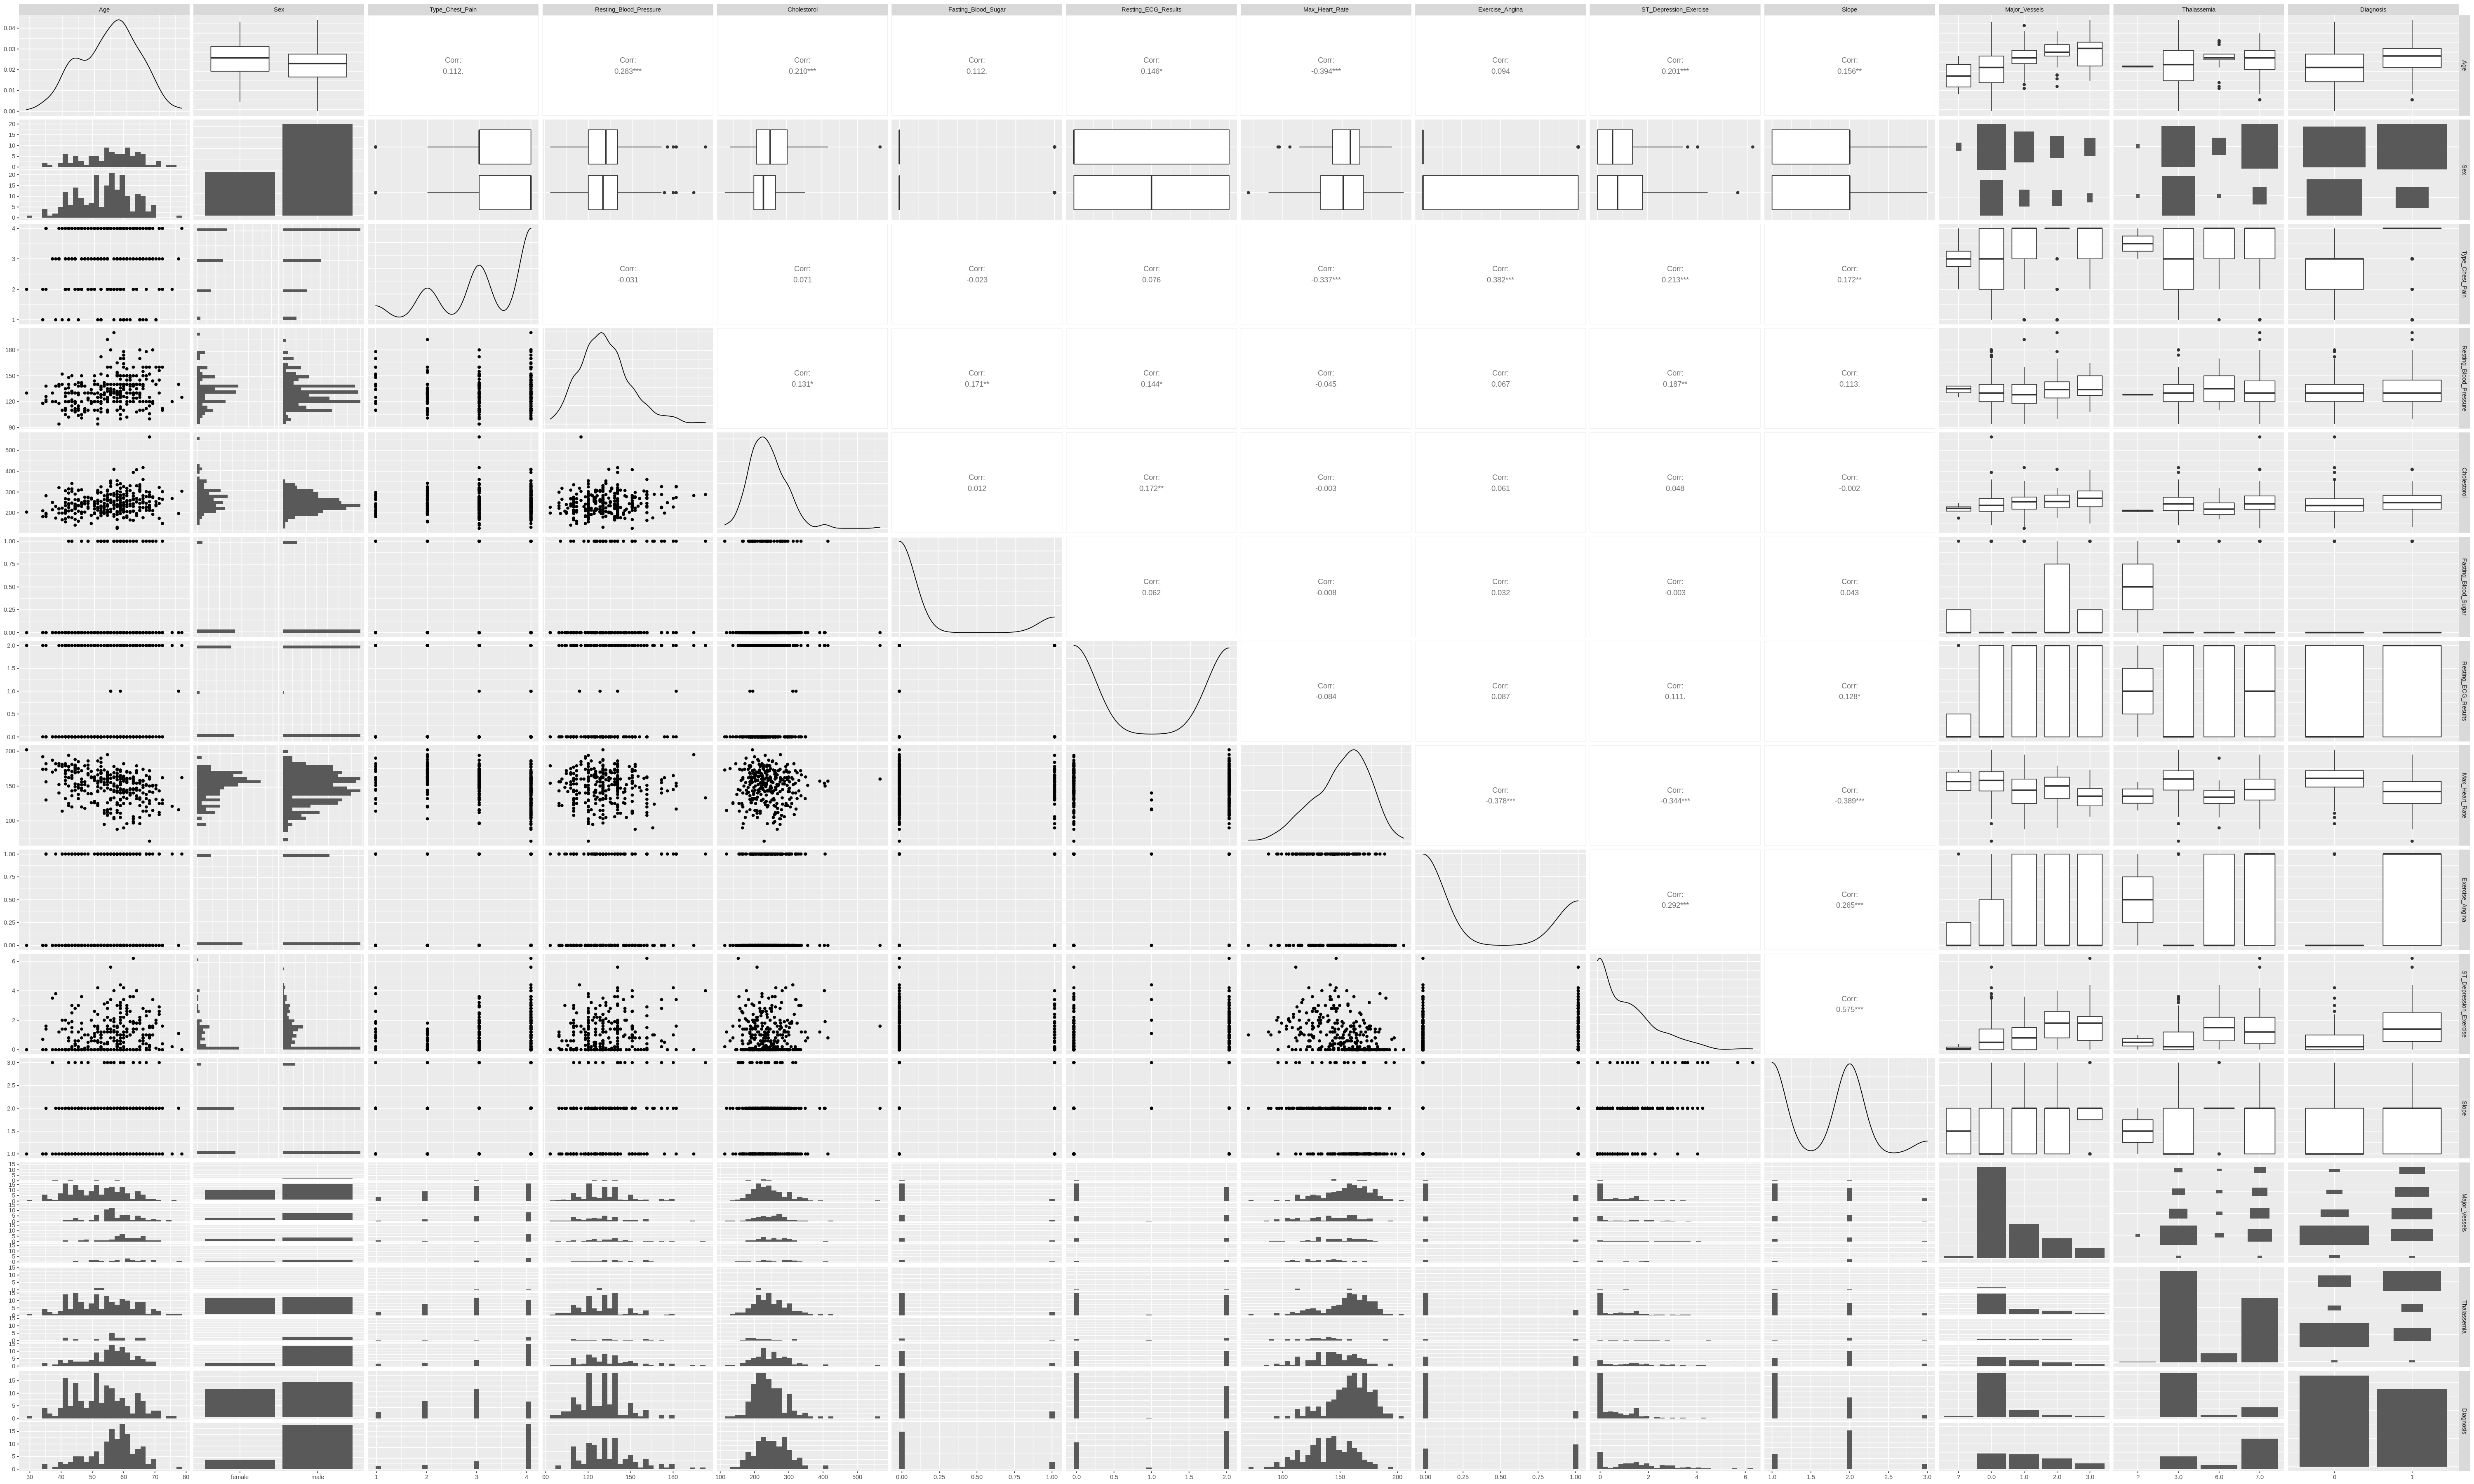

In [33]:
options(repr.plot.height = 30, repr.plot.width = 50)
cleveland_pairs <- cleveland_tidy_data |>
    ggpairs()
cleveland_pairs

In [34]:
set.seed(2000)

cleveland_recipe <- recipe(Diagnosis ~ Cholestorol + Max_Heart_Rate, data = cleveland_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

cleveland_vfold <- vfold_cv(cleveland_training, v = 10, strata = Diagnosis)

k_vals <- tibble(neighbors = seq(1, 100, 5))

knn_results <- workflow() |>
       add_recipe(cleveland_recipe) |>
       add_model(knn_spec) |>
       tune_grid(resamples = cleveland_vfold, grid = k_vals) |>
       collect_metrics()

accuracies <- knn_results |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
      arrange(desc(mean))


accuracies

ERROR: [1m[33mError[39m in [1m[1m`check_installs()`:[22m
[33m![39m Some package installs are required: 
[36m•[39m 'kknn', 'kknn'


In [ ]:
accuracy_k_graph <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy", title = "Accuracies for k between 0 and 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) +
      theme(text = element_text(size = 15))

accuracy_k_graph

In [ ]:
set.seed(2001)

knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 66) |>
       set_engine("kknn") |>
       set_mode("classification")

cleveland_fit <- workflow() |>
       add_recipe(cleveland_recipe) |>
       add_model(knn_spec_2) |>
       fit(data = cleveland_training)

cleveland_predictions <- predict(cleveland_fit, cleveland_testing) |>
    bind_cols(cleveland_testing)
cleveland_predictions

cleveland_metrics <- cleveland_predictions |>
    metrics(truth = Diagnosis, estimate = .pred_class)
cleveland_metrics

In [ ]:
onf_mat<- cleveland_predictions |>
    conf_mat(truth = Diagnosis, estimate = .pred_class)
conf_mat

### Expected outcomes and significance:

We are expect to find whether or not a patient will be more likely to have a positive diagnosis of heart disease based on lower max heart rate and higher age.

Our findings could have potential implications for the early detection and prevention of heart disease. This analysis could lead to further questions about the most important predictors of heart disease and the effectiveness of different interventions for preventing heart disease.

Some further questions we have:

1. Is there any potential relationship between each predictor?

2. To prevent heart disease, is there any other predictor we can measure and analyze?

### References:

For our project, in addition to our chosen dataset, we used two sources to do some background research. These sources can be found below:

“Know Your Risk for Heart Disease.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 21 Mar. 2023, www.cdc.gov/heartdisease/risk_factors.htm#:~:text=Eating%20a%20diet%20high%20in,can%20lead%20to%20heart%20disease. 

“Processed.cleveland.data.” archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data. 

Rawat, Shubhankar. “Heart Disease Prediction.” Medium, Towards Data Science, 28 June 2021, towardsdatascience.com/heart-disease-prediction-73468d630cfc. 